In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import xml.etree.ElementTree as ET

In [5]:
train = pd.read_csv("train.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
train.drop(columns="PoolQC",inplace=True)
train.drop(columns="MiscFeature",inplace=True)
train.drop(columns="Alley",inplace=True)
train.drop(columns="Fence",inplace=True)
train.drop(columns="FireplaceQu",inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
qualitative =  [f for f in train.columns if train.dtypes[f] == 'object']
qualitative

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [9]:
train['LotFrontage'].fillna(train['LotFrontage'].median(),inplace=True)
train['GarageYrBlt'].fillna(0,inplace=True)
train["MasVnrType"].fillna("None", inplace=True)
train["MasVnrArea"].fillna(0, inplace=True)
train["BsmtQual"].fillna("NA", inplace=True)
train["BsmtCond"].fillna("NA", inplace=True)
train["BsmtExposure"].fillna("NA", inplace=True)
train["BsmtFinType1"].fillna("NA", inplace=True)
train["BsmtFinType2"].fillna("NA", inplace=True)
train["Electrical"].fillna(train["Electrical"].mode()[0], inplace=True)
train["GarageType"].fillna("NA", inplace=True)
train["GarageFinish"].fillna("NA", inplace=True)
train["GarageQual"].fillna("NA", inplace=True)
train["GarageCond"].fillna("NA", inplace=True)


In [10]:
train.info()
print('Total duplicate Values in the train dataset = ',train.duplicated().sum())
print('Total missing values in train dataset = ',train.isnull().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [11]:
for i in qualitative :
    
    train[i] = pd.Categorical(train[i])
    train[i] = pd.get_dummies(train[i])

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   uint8  
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   uint8  
 6   LotShape       1460 non-null   uint8  
 7   LandContour    1460 non-null   uint8  
 8   Utilities      1460 non-null   uint8  
 9   LotConfig      1460 non-null   uint8  
 10  LandSlope      1460 non-null   uint8  
 11  Neighborhood   1460 non-null   uint8  
 12  Condition1     1460 non-null   uint8  
 13  Condition2     1460 non-null   uint8  
 14  BldgType       1460 non-null   uint8  
 15  HouseStyle     1460 non-null   uint8  
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [13]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [15]:
test["MSZoning"].fillna(test["MSZoning"].mode()[0], inplace=True)
test["LotFrontage"].fillna(0 , inplace=True)
test["Utilities"].fillna(test["Utilities"].mode()[0], inplace=True)
test["Exterior1st"].fillna("Other", inplace=True)
test["Exterior2nd"].fillna("Other", inplace=True)
test["MasVnrType"].fillna("None", inplace=True)
test["MasVnrArea"].fillna(0, inplace=True)
test["BsmtQual"].fillna("NA", inplace=True)
test["BsmtCond"].fillna("NA", inplace=True)
test["BsmtExposure"].fillna("NA", inplace=True)
test["BsmtFinType1"].fillna("NA", inplace=True)
test["BsmtFinSF1"].fillna(0, inplace=True)
test["BsmtFinType2"].fillna("NA", inplace=True)
test["BsmtFinSF2"].fillna(0, inplace=True)
test["BsmtUnfSF"].fillna(0, inplace=True)
test["TotalBsmtSF"].fillna(0, inplace=True)
test["BsmtFullBath"].fillna(test["BsmtFullBath"].mode()[0], inplace=True)
test["BsmtHalfBath"].fillna(test["BsmtHalfBath"].mode()[0], inplace=True)
test["KitchenQual"].fillna(test["KitchenQual"].mode()[0], inplace=True)
test["Functional"].fillna(test["Functional"].mode()[0], inplace=True)
test["GarageType"].fillna("NA", inplace=True)
test["GarageYrBlt"].fillna(0, inplace=True)##
test["GarageFinish"].fillna("NA", inplace=True)
test["GarageCars"].fillna(0, inplace=True)
test["GarageArea"].fillna(0, inplace=True)
test["GarageQual"].fillna("NA", inplace=True)
test["GarageCond"].fillna("NA", inplace=True)
test["SaleType"].fillna("Oth", inplace=True)
test.drop(columns='Alley', inplace=True)
test.drop(columns='PoolQC', inplace=True)
test.drop(columns='FireplaceQu', inplace=True)
test.drop(columns='Fence', inplace=True)
test.drop(columns='MiscFeature', inplace=True)

In [16]:
qualitative =  [f for f in train.columns if train.dtypes[f] == 'object']
qualitative
for i in qualitative :
    
    train[i] = pd.Categorical(train[i])
    train[i] = pd.get_dummies(train[i])


In [17]:
from sklearn.model_selection import train_test_split
train['SalePrice'] = np.log1p(train['SalePrice'])


train_df, val_df = train_test_split(train, test_size=0.05, random_state=80)

X_train = train_df.drop(columns=['Id', 'SalePrice'])
y_train = train_df['SalePrice']

X_val = val_df.drop(columns=['Id', 'SalePrice'])
y_val = val_df['SalePrice']

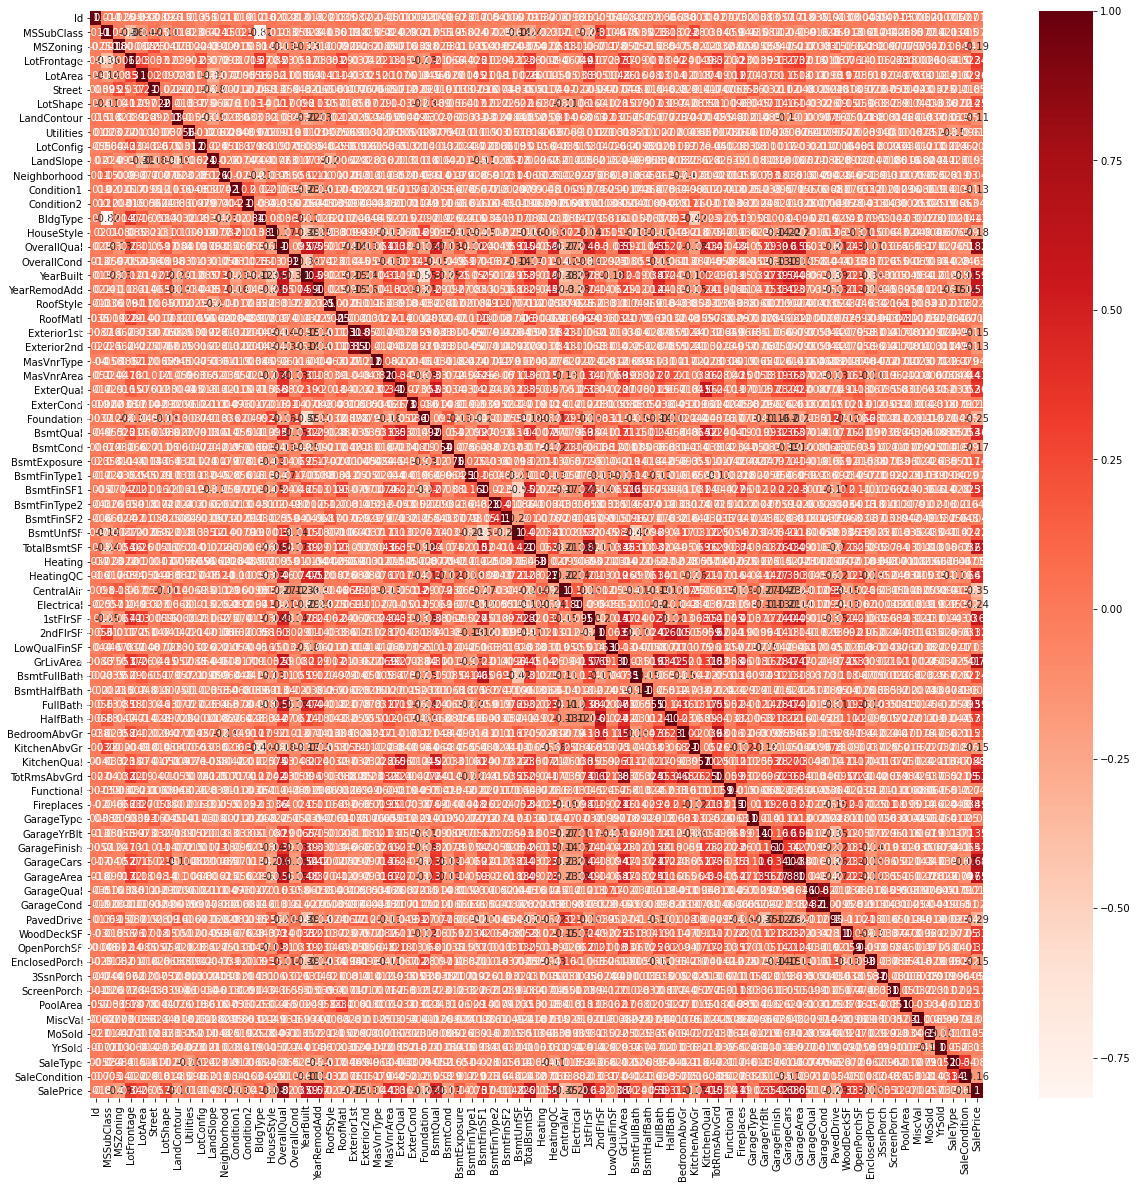

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
cor = train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [19]:
# Consider correlations only with the target variable
cor_target = abs(cor['SalePrice'])

#Select correlations with a correlation above a threshold
features2 = cor_target[cor_target>0.2]

feat=list(features2.keys())
feat.remove('SalePrice') 

print(feat)
new_X = X_train[feat]
new_X_val = X_val[feat]

['LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF']


In [20]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2 , f_regression

KBest = SelectKBest(score_func = f_regression, k = 50)
KBest = KBest.fit(X_train,y_train)

df_scores = pd.DataFrame({'features': X_train.columns, 'f_regression': KBest.scores_, 'pValue': KBest.pvalues_ })
df_scores

,features,f_regression,pValue
0,MSSubClass,9.238440,2.414285e-03
1,MSZoning,53.701494,3.950571e-13
2,LotFrontage,164.543065,1.130946e-35
3,LotArea,104.230841,1.208710e-23
4,Street,4.743307,2.958073e-02
...,...,...,...
69,MiscVal,0.887209,3.463989e-01
70,MoSold,3.953113,4.698131e-02
71,YrSold,1.597120,2.065245e-01
72,SaleType,8.647135,3.330138e-03


In [21]:
cols = KBest.get_support(indices=True)
cols
features = X_train.columns[cols]
list(features)

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'LotShape',
 'LandContour',
 'Condition1',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'YearBuilt',
 'YearRemodAdd',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrArea',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'PoolArea',
 'SaleType',
 'SaleCondition']

In [22]:
final_train = X_train[features]
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg_model=PolynomialFeatures(degree=1)
X_poly=poly_reg_model.fit_transform(final_train)
# poly_reg.fit(X_poly,y)
lin_reg_model=LinearRegression()
lin_reg_model.fit(X_poly,y_train)

LinearRegression()

In [23]:
final_val = X_val[features]
X_val_poly=poly_reg_model.fit_transform(final_val )
print("The accuracy of the classifier on the validation set is ", (lin_reg_model.score(X_val_poly,y_val)))

The accuracy of the classifier on the validation set is  0.9106189551573076


In [24]:
# train_feat = final_train.columns
# test_feat = test.columns
# common_feat = set(test_feat).intersection(train_feat)
# test_features_d_c = set(test_feat).difference(common_feat)
# train_features_d_c = set(train_feat).difference(common_feat)
# test_feat =test_feat.drop(test_features_d_c)
# test = test[test_feat]
# for i in list(set(train_feat).difference(common_feat)):
#     test[i] = 0
# test.shape

# x_=poly_reg_model.fit_transform(test)

y_test_predict = lin_reg_model.predict(X_val_poly)
y_result = np.expm1(y_test_predict)
y_result

array([135532.503112  , 132355.7754706 , 151243.41436633, 173273.73933051,
       158317.20051483, 174709.43445553, 189218.48319596, 158684.92187763,
       233795.52328809, 235347.30366816, 270545.96180903,  87391.06770348,
       134214.03525745, 147698.04903807, 158044.23521189,  96729.94966849,
       206734.01921086, 371436.20278919, 343055.64736763, 182371.33847265,
       134911.89627987, 103151.62466372, 138228.07760505, 287004.15616071,
       137973.91371836, 200476.08166318, 234010.60070777, 148553.71723704,
       170339.66695892, 145892.11237177, 149545.09844151, 348161.92092891,
       275389.91637379, 220010.29705715, 133151.1046129 , 125474.27881468,
       162342.29033567, 275744.16626343, 343737.2038107 , 255079.12804874,
       311743.10536842, 159863.44595979, 118107.09783449, 146820.53747471,
       251188.81963724, 225606.78106099, 163219.10025149, 197030.82890423,
       202587.45881858,  77088.39484644, 269007.65481871, 164645.01325992,
        85934.02788483, 1

In [31]:
# !pip3 install sklite

In [32]:
# from sklite import LazyExport


In [33]:
# lazy = LazyExport(lin_reg_model)

In [34]:
lin_reg_model

LinearRegression()

In [55]:
lin_reg_model.coef_

array([-6.55150170e-15, -2.64763201e-04, -3.61987422e-01, -2.56767926e-04,
        1.78296288e-06,  2.34944552e-02, -4.53305141e-02, -7.60098380e-02,
        4.93537403e-02,  1.45508834e-02,  8.22928385e-02,  4.33123227e-04,
        1.90539706e-03, -5.32413282e-02,  3.42621127e-02,  3.29274109e-06,
       -2.05311362e-02, -4.75664542e-02,  5.53678119e-02, -6.15432585e-02,
        1.62321484e-02,  7.92716075e-03,  1.23970641e-05, -2.45461809e-05,
        6.86395231e-05,  3.78183852e-02, -7.38948200e-02,  1.15160773e-02,
        3.87099101e-05,  1.54584143e-05,  1.34600024e-04,  4.77396681e-02,
        4.73635332e-02,  2.15306242e-02,  5.97038383e-03, -3.11767365e-02,
        5.63438720e-02,  1.07315066e-02,  3.53612901e-02,  7.65221694e-06,
        3.10546203e-04,  6.93608910e-02,  1.51397886e-05, -5.05658763e-02,
        1.19467978e-04,  2.99039775e-05,  1.25673707e-04,  3.69620889e-04,
       -3.00675044e-04, -1.40342185e-02, -7.41859388e-02])

In [63]:
 np.expm1((lin_reg_model.coef_*X_val_poly[0]).sum()+lin_reg_model.intercept_)

135532.50311199517

In [86]:
lin_reg_model.coef_*X_val_poly[0]

array([-6.55150170e-15, -5.29526401e-03, -0.00000000e+00, -1.77169869e-02,
        1.84625806e-02,  2.34944552e-02, -0.00000000e+00, -0.00000000e+00,
        4.93537403e-02,  0.00000000e+00,  4.11464193e-01,  8.51953388e-01,
        3.74791603e+00, -0.00000000e+00,  0.00000000e+00,  6.45377254e-04,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  8.61595953e-03, -1.27394679e-02,
        8.33283810e-02,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.69938309e-02,  0.00000000e+00,  1.63404430e-01,  0.00000000e+00,
        9.47270664e-02,  0.00000000e+00,  1.79111515e-02, -3.11767365e-02,
        0.00000000e+00,  5.36575332e-02,  3.53612901e-02,  1.50519107e-02,
        0.00000000e+00,  6.93608910e-02,  4.81445276e-03, -0.00000000e+00,
        0.00000000e+00,  3.31934151e-03,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00])

In [53]:
final_val.iloc[0].values.shape

(50,)

In [85]:
(lin_reg_model.coef_*X_val_poly[0]).sum()+lin_reg_model.intercept_

11.816974144178383

In [83]:
final_val.iloc[0].values

array([2.0000e+01, 0.0000e+00, 6.9000e+01, 1.0355e+04, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 5.0000e+00,
       1.9670e+03, 1.9670e+03, 0.0000e+00, 0.0000e+00, 1.9600e+02,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 6.9500e+02, 5.1900e+02, 1.2140e+03, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.2140e+03, 0.0000e+00, 1.2140e+03,
       0.0000e+00, 2.0000e+00, 0.0000e+00, 3.0000e+00, 1.0000e+00,
       0.0000e+00, 5.0000e+00, 1.0000e+00, 1.9670e+03, 0.0000e+00,
       1.0000e+00, 3.1800e+02, 0.0000e+00, 0.0000e+00, 1.1100e+02,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00])

In [70]:
app_json = json.dumps({'coef':list(lin_reg_model.coef_),'intercept':lin_reg_model.intercept_})


In [71]:
app_json

'{"coef": [-6.551501703545055e-15, -0.0002647632005873361, -0.3619874215285461, -0.0002567679257396598, 1.7829628791155017e-06, 0.023494455177372343, -0.0453305141475185, -0.07600983800217832, 0.04935374032453429, 0.014550883407300217, 0.08229283853462063, 0.00043312322725811564, 0.0019053970645113612, -0.053241328183464644, 0.03426211273529104, 3.292741090232809e-06, -0.02053113615181348, -0.047566454214394885, 0.05536781187045855, -0.061543258467686685, 0.016232148389556264, 0.007927160747034964, 1.239706407271668e-05, -2.454618089724192e-05, 6.863952307473165e-05, 0.03781838515250995, -0.0738948200251264, 0.011516077276754964, 3.8709910108625234e-05, 1.545841430289352e-05, 0.00013460002441596092, 0.04773966808440893, 0.04736353321402917, 0.02153062419643368, 0.005970383830734594, -0.03117673653517319, 0.0563438719798464, 0.010731506633200105, 0.03536129010887518, 7.652216940941259e-06, 0.00031054620318256764, 0.06936089095903757, 1.51397885502641e-05, -0.050565876310618554, 0.000119

In [72]:
f = open("model.json", "w")
f.write(app_json)
f.close()